In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
import io

In [4]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [40]:
recordfile = r"E:\Kuliah\Bangkit\Capstone\Dataset\DatasetTFRecord\UFPR-ALPR.tfrecords"
raw_dataset = tf.data.TFRecordDataset(recordfile)
raw_dataset


# https://stackoverflow.com/questions/51409906/converting-tfrecords-back-into-jpeg-images
image_feature_description = {
    'image/height': tf.io.FixedLenFeature([], dtype=tf.int64),
    'image/width': tf.io.FixedLenFeature([], dtype=tf.int64),
    'image/filename': tf.io.FixedLenFeature([], dtype=tf.string),
    'image/source_id': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], dtype=tf.string),
    'image/format': tf.io.FixedLenFeature([], dtype=tf.string),
    'image/object/bbox/xmin': tf.io.FixedLenFeature([], tf.float32),
    'image/object/bbox/xmax': tf.io.FixedLenFeature([], tf.float32),
    'image/object/bbox/ymin': tf.io.FixedLenFeature([], tf.float32),
    'image/object/bbox/ymax': tf.io.FixedLenFeature([], tf.float32),
    'image/object/class/text': tf.io.FixedLenFeature([], tf.float32),
    'image/object/class/label': tf.io.FixedLenFeature([], dtype=tf.int64),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# parsed_image_dataset = raw_dataset.map(_parse_image_function)
# parsed_image_dataset

def _parse_image_sequences_function(example_proto):
    return tf.io.parse_sequence_example(example_proto, image_feature_description)

parsed_image_dataset_sequence = raw_dataset.map(_parse_image_sequences_function)
parsed_image_dataset_sequence

<MapDataset shapes: ({image/encoded: (), image/filename: (), image/format: (), image/height: (), image/object/bbox/xmax: (), image/object/bbox/xmin: (), image/object/bbox/ymax: (), image/object/bbox/ymin: (), image/object/class/label: (), image/object/class/text: (), image/source_id: (), image/width: ()}, {}, {}), types: ({image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/object/class/text: tf.float32, image/source_id: tf.string, image/width: tf.int64}, {}, {})>

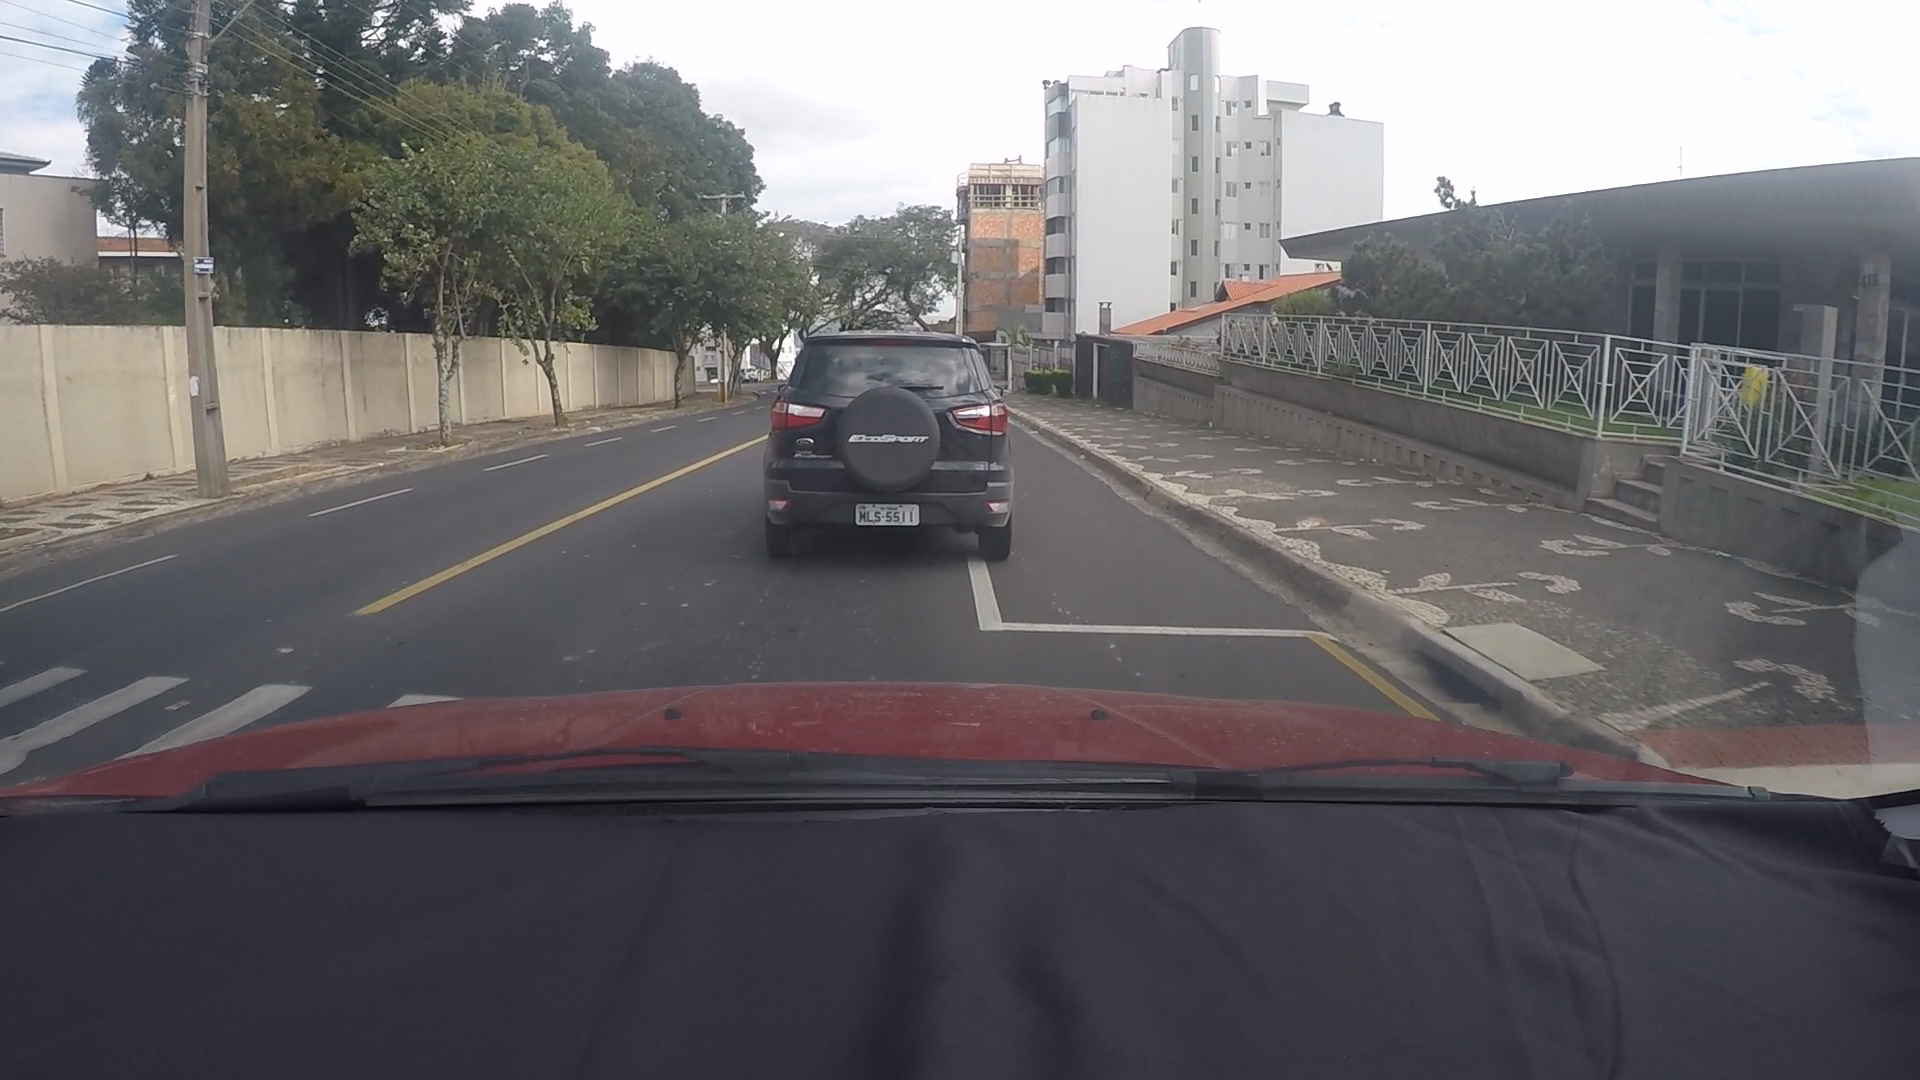

In [34]:

filename = feat["image/filename"].bytes_list.value[0].decode("utf-8")
img =  feat["image/encoded"].bytes_list.value[0]
img_buffer = io.BytesIO(img)
Image.open(img_buffer)